In [45]:
#this is notebook for question 5 using K nearest neighbor algorithm
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [46]:
iris= load_iris()
items= iris.data
target= iris.target
#names will be used for the last classification question
names= iris.target_names

classes= {}
#find how many classes
for label in set(target):
    classes[label]= sum(label== target)
    
for label, count in classes.items():
    print("Class:", label, ": ", count, "elements")
    

Class: 0 :  50 elements
Class: 1 :  50 elements
Class: 2 :  50 elements


In [47]:
#Build a KNeighborsClassifier with k = 1 to predict the class
knc= KNeighborsClassifier(n_neighbors=1)
knc.fit(items, target)
target_pred= knc.predict(items)

#accuracy calc
correct= sum(target == target_pred)
total= len(target)
accuracy= correct/ total

print('Accuracy on Iris dataset:', accuracy)

#getting 100% accuracy is suspicious, it's perfectly classifying all the data
#the model is correctly fitting the data, however we can debate how reliable it is
#while the training data is perfectly classified, we do not know how the model will react to unseen data
#it would be best to split the data into groups so that there are test groups and training
#we need to cross validate our data to make it really meaningful

Accuracy on Iris dataset: 1.0


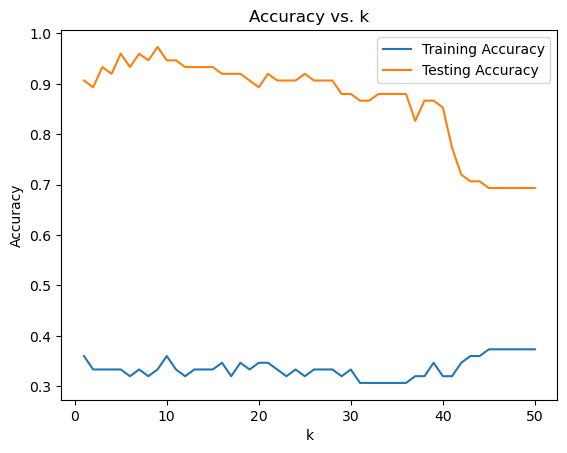

Best k value: 9


In [48]:
#Split dataset
#ive had to look online to see how the train test split works
X= items
y= target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)
kvalue= range(1, 51)

train_acc = []
test_acc = []

#iterates over different k values
for k in kvalue:
    knc = KNeighborsClassifier(n_neighbors =k)
    knc.fit(X_train, y_train)
    
    pred_ytrain = knc.predict(X_train)
    pred_ytest = knc.predict(X_test)
    
    acurracytrain = np.mean(pred_ytest == y_train)
    accuracytest = np.mean(pred_ytest == y_test)
    
    train_acc.append(acurracytrain)
    test_acc.append(accuracytest)

plt.plot(kvalue, train_acc, label= 'Training Accuracy')
plt.plot(kvalue, test_acc, label= 'Testing Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.legend()
plt.show()

# Find the best k value
best = kvalue[np.argmax(test_acc)]
print("Best k value:", best)

In [42]:
#plant classification
best_knc= KNeighborsClassifier(n_neighbors = best)
best_knc.fit(X, y)

flower = [[5.0, 4.1, 3.8, 1.2]] 

predicted_class = best_knc.predict(flower)
predicted_species = names[predicted_class[0]]

print(f"Predicted class:", predicted_species)

Predicted class: versicolor
